## Advanced Regression Assignment

- Name: Gautam Bhutani
- Email: bhutanigautam185@gmail.com
- Batch: C37
- Github : https://github.com/GautiBhutani/HousePredictionAssignment (as it was mentioned by UPGRAD's Support team)

## Business Problem

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Understanding and Exploration

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house_df = pd.read_csv("train.csv")

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the dimensions
house_df.shape

(1460, 81)

In [5]:
# Check for column details for type and nulls
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# To get the description of the dataset
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Check for duplicate values in the dataset

house_df[house_df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [8]:
#checking duplicate IDs if any
sum(house_df.duplicated(subset = 'Id')) == 0

True

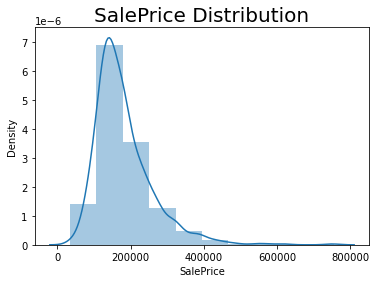

In [9]:
# Visualise the target variable

plt.title('SalePrice Distribution', fontdict = {'fontsize' : 20})
sns.distplot(house_df['SalePrice'], bins=10)
plt.show()

**The target value seems to be normalized with some noise.We can normalize the variable with some transformation.**

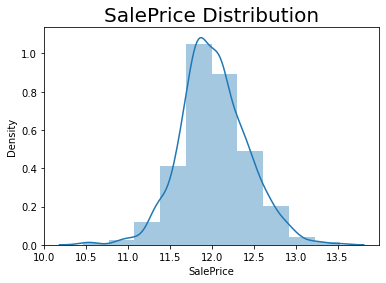

In [10]:


#Tranforming the SalePrice variable
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

plt.title('SalePrice Distribution', fontdict = {'fontsize' : 20})
sns.distplot(house_df['SalePrice'], bins=10)
plt.show()

In [11]:
# Checking for null value columns
house_df.isnull().sum()[round(100*(house_df.isnull().sum()/len(house_df.index)), 2) > 0.00]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
# Replace NA with None in the following columns below : 

for col in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']:
    
    house_df[col]=house_df[col].fillna('None')

In [13]:
# Checking for null value columns
house_df.isnull().sum()[round(100*(house_df.isnull().sum()/len(house_df.index)), 2) > 0.00]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [14]:

# MSSubClass is a categorical variable represented by numbers, Hence converting the dtype to object
house_df['MSSubClass'] = house_df['MSSubClass'].astype('object')

# 'Electrical' and 'MasVnrType' variable had a NaN value which is replaced by mode
house_df['Electrical'].fillna('SBrkr',inplace=True)
house_df['MasVnrType'].fillna('None',inplace=True)

# Impute the null values with median values for LotFrontage and MasVnrArea columns

house_df['LotFrontage'] = house_df['LotFrontage'].replace(np.nan, house_df['LotFrontage'].median())
house_df['MasVnrArea'] = house_df['MasVnrArea'].replace(np.nan, house_df['MasVnrArea'].median())


# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

house_df['GarageYrBlt']=house_df['GarageYrBlt'].fillna(0)
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].astype(int)


In [15]:
# Checking for null value columns
house_df.isnull().sum()[round(100*(house_df.isnull().sum()/len(house_df.index)), 2) > 0.00]

Series([], dtype: int64)

## EDA and outlier treatment

In [16]:
#Distribution and box plots function
def bi_plots(var):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.title(f"{var} Distribution", fontdict = {'fontsize' : 20})
    sns.distplot(house_df[var], hist=False,rug=True)
    plt.subplot(1,2,2)
    plt.title(f"{var} vs Count", fontdict = {'fontsize' : 20})
    sns.boxplot(y = var, palette='CMRmap', data = house_df)
    plt.show()

In [17]:
# Checking outliers at 25%,50%,75%,90%,95% and above

house_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057
std,421.610009,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399449
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
90%,1314.100000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,12.535380
95%,1387.050000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,12.694962
99%,1445.410000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,22

<Figure size 720x360 with 0 Axes>

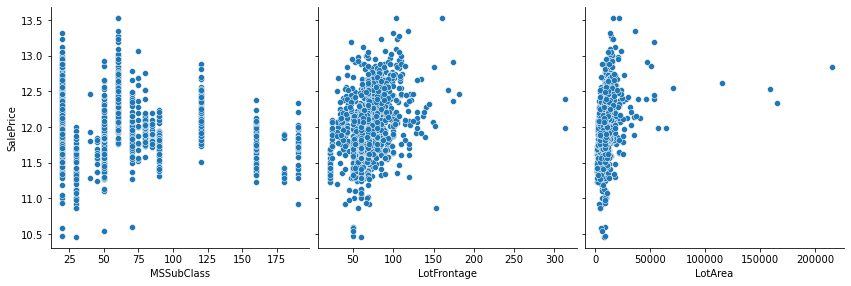

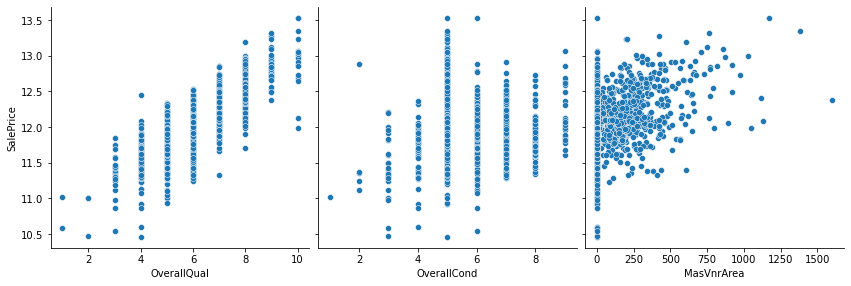

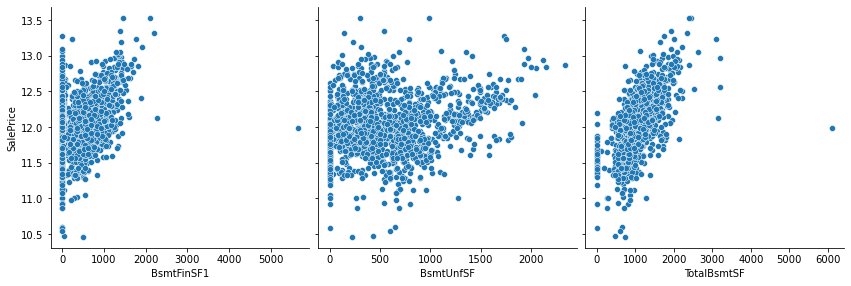

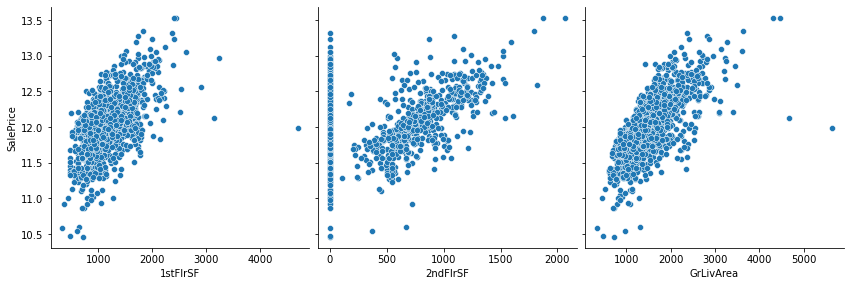

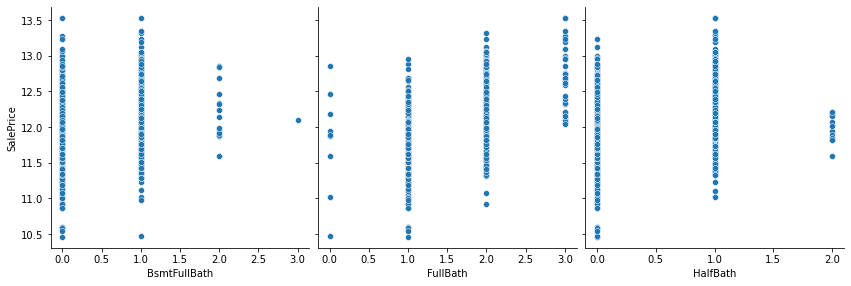

In [18]:
# # Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house_df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

We can see that there is non linear relationship between the target variable and other independent variables.

In [19]:
# Check the outliers in all the numeric columns

In [20]:
house_df['LotFrontage'].describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
5%         35.950000
25%        60.000000
50%        69.000000
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

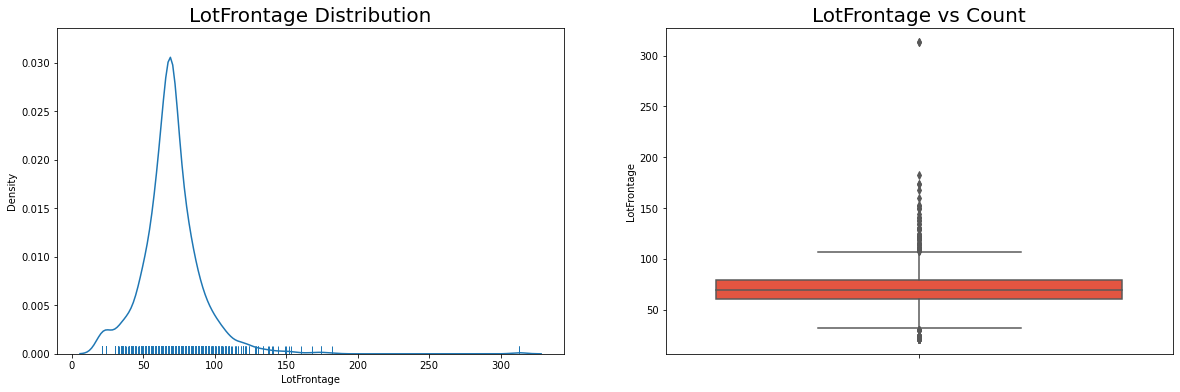

In [21]:
bi_plots('LotFrontage')

In [22]:
lower_percentile = 0.05
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['LotArea'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['LotArea'][house_df['LotArea'] < low] = low

#cap values above high to high
house_df['LotArea'][house_df['LotArea'] > high] = high

In [23]:
# # outlier treatment
# plt.boxplot(house_df['LotArea'])
# Q1 = house_df['LotArea'].quantile(0.1)
# Q3 = house_df['LotArea'].quantile(0.9)
# IQR = Q3 - Q1
# house_df = house_df[(house_df['LotArea'] >= Q1 - 1.5*IQR) & 
#                       (house_df['LotArea'] <= Q3 + 1.5*IQR)]

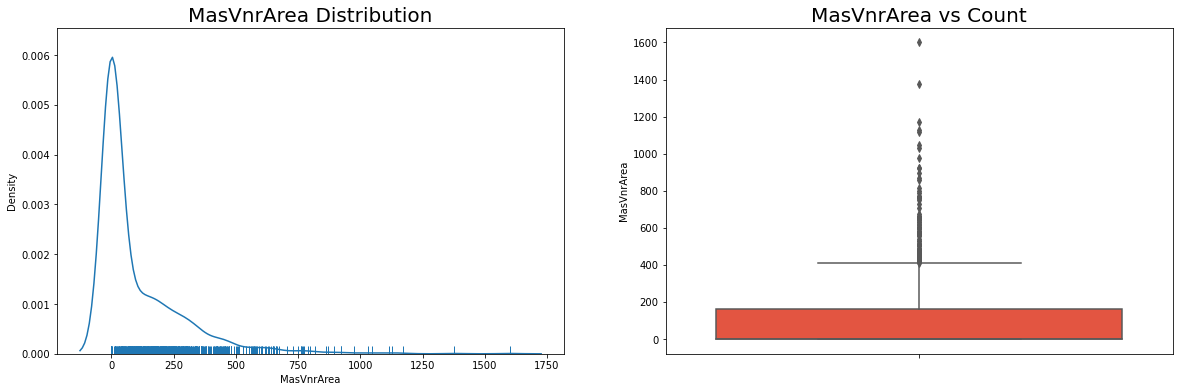

In [24]:
bi_plots('MasVnrArea')

In [25]:
lower_percentile = 0.00
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['MasVnrArea'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['MasVnrArea'][house_df['MasVnrArea'] < low] = low

#cap values above high to high
house_df['MasVnrArea'][house_df['MasVnrArea'] > high] = high

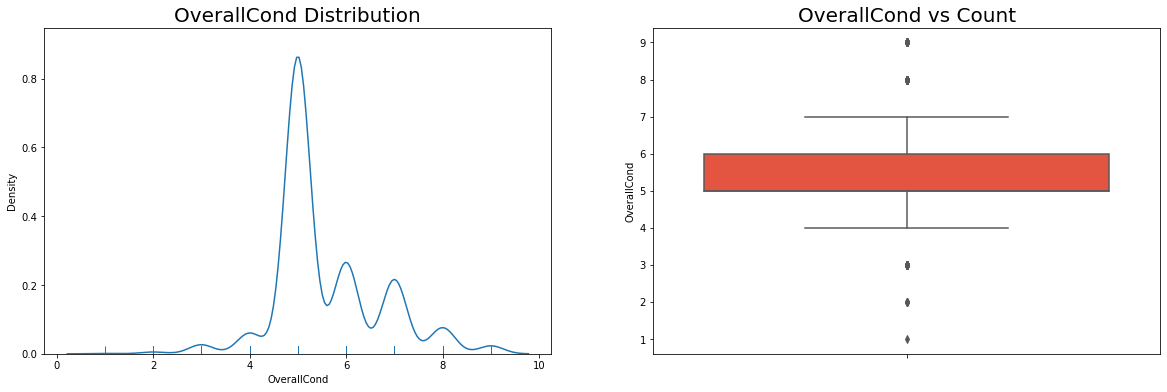

In [26]:
bi_plots('OverallCond')

In [27]:
lower_percentile = 0.05
higher_percentile = 0.98

#returns values at the given quantile within the specified range
low, high = house_df['OverallCond'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['OverallCond'][house_df['OverallCond'] < low] = low

#cap values above high to high
house_df['OverallCond'][house_df['OverallCond'] > high] = high

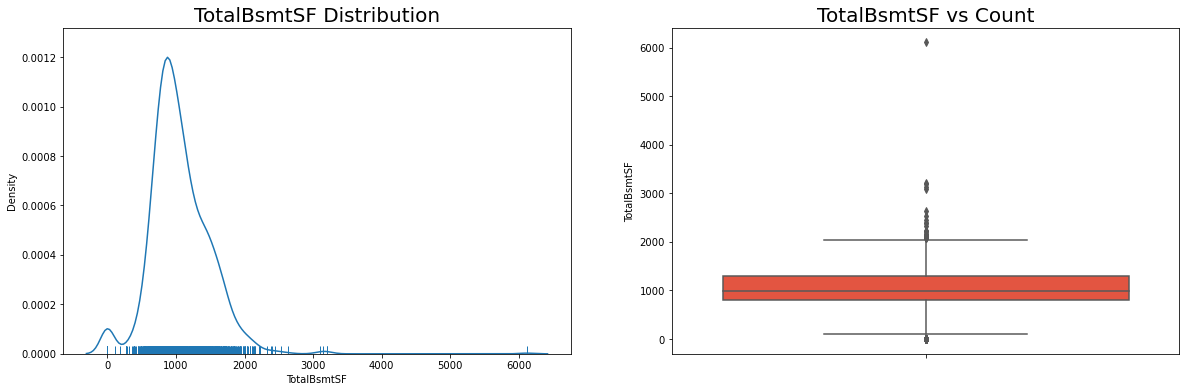

In [28]:
bi_plots('TotalBsmtSF')

In [29]:
lower_percentile = 0.02
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['TotalBsmtSF'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['TotalBsmtSF'][house_df['TotalBsmtSF'] < low] = low

#cap values above high to high
house_df['TotalBsmtSF'][house_df['TotalBsmtSF'] > high] = high

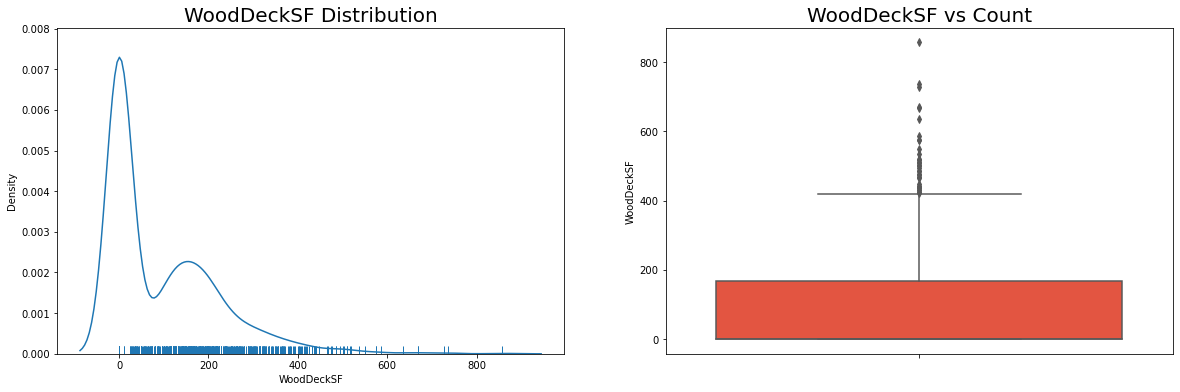

In [30]:
bi_plots('WoodDeckSF')

In [31]:
lower_percentile = 0.00
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['WoodDeckSF'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['WoodDeckSF'][house_df['WoodDeckSF'] < low] = low

#cap values above high to high
house_df['WoodDeckSF'][house_df['WoodDeckSF'] > high] = high

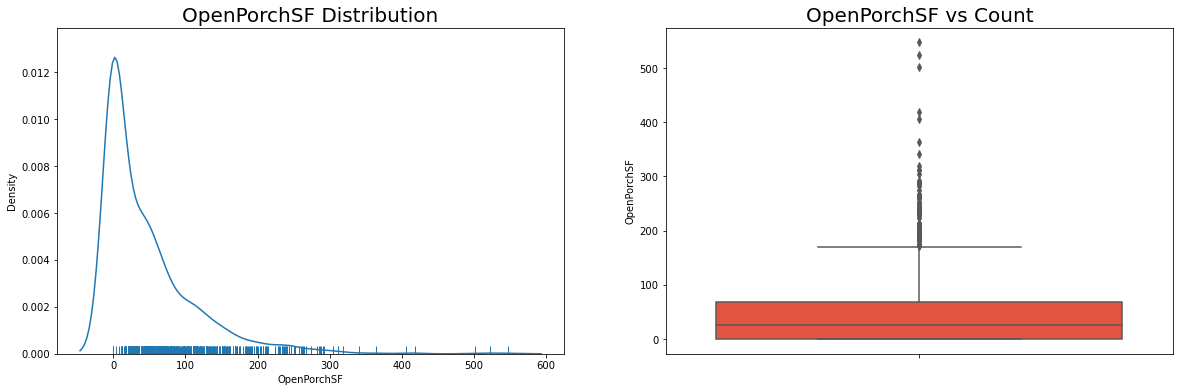

In [32]:
bi_plots('OpenPorchSF')

In [33]:
lower_percentile = 0.00
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = house_df['OpenPorchSF'].quantile([lower_percentile, higher_percentile])

#cap values below low to low
house_df['OpenPorchSF'][house_df['OpenPorchSF'] < low] = low

#cap values above high to high
house_df['OpenPorchSF'][house_df['OpenPorchSF'] > high] = high

In [34]:
# Determine the percentage of data retained

num_data = round(100*(len(house_df)/1460),2)
print(num_data)

100.0


In [35]:
# Check the shape of the dataframe

house_df.shape

(1460, 81)

In [36]:
# Drop 'Id' from Dataframe

house_df = house_df.drop(['Id'], axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61.0,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0.0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42.0,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35.0,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84.0,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [37]:
#Droping year and months columns
house_df = house_df.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'], axis = 1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61.0,0,0,0,0,None,None,None,0,WD,Normal,12.247699
1,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0.0,0,0,0,0,None,None,None,0,WD,Normal,12.109016
2,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42.0,0,0,0,0,None,None,None,0,WD,Normal,12.317171
3,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35.0,272,0,0,0,None,None,None,0,WD,Abnorml,11.849405
4,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84.0,0,0,0,0,None,None,None,0,WD,Normal,12.429220


In [38]:
house_df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [39]:
house_df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

**there are many variables which is comprised of single value** 

We can remove variables which have largest value in more than 80% of the records.

In [40]:
#checking the columns 
columns = []
numerical_columns = house_df.select_dtypes(include=['object','int64', 'float'])
for col in (numerical_columns):
    if(house_df[col].value_counts().max() >= 1200):
        columns.append(col)

In [41]:
columns

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal',
 'SaleType']

In [42]:
#dropping those columns

In [43]:
house_df = house_df.drop(['GarageQual','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','MiscFeature','PavedDrive','BsmtCond','SaleType',
'KitchenAbvGr','CentralAir', '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal','Street', 'Alley','Utilities','RoofMatl',
'Condition1', 'Condition2','LandSlope', 'Heating','BsmtFinType2', 'Electrical','GarageCond', 'Fence','Functional' ,'ExterCond','LandContour','EnclosedPorch'], axis = 1)

In [44]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61.0,Normal,12.247699
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0.0,Normal,12.109016
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42.0,Normal,12.317171
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35.0,Abnorml,11.849405
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84.0,Normal,12.429220


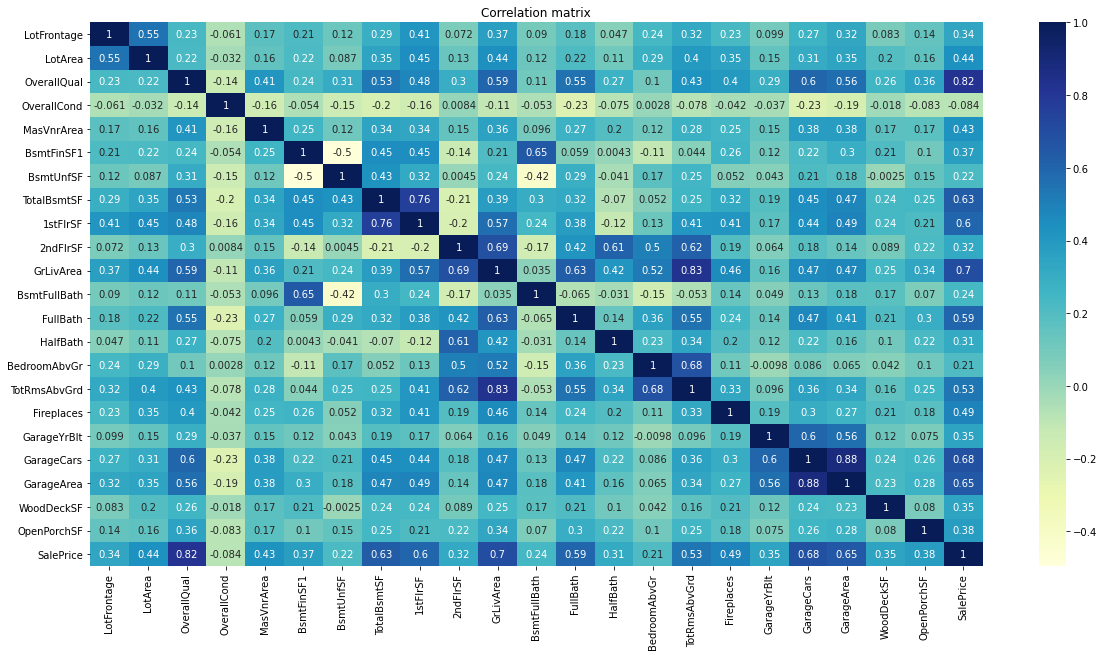

In [45]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(house_df.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation matrix")
plt.show()

##### Coorelated variables
- The coorelation between TotRmsAbvGrd and GrLivArea is 83%.
- The coorelation between Garage Area and Garage Cars is 88%.

In [46]:
# Removing the highly correlated variables

house_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [47]:
house_df.shape

(1460, 43)

## Encoding

In [48]:
# Since the values of the following fields are ordinal, we will assign values in sequence order

# For values which can be ordered, we have given an ordered sequence value

#house_df['LandContour'] = house_df['LandContour'].map({'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0})
house_df['LotShape'] = house_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_df['LotConfig'] = house_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
house_df['ExterQual'] = house_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_df['BsmtQual'] = house_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['BsmtExposure'] = house_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
house_df['HeatingQC'] = house_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['KitchenQual'] = house_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['FireplaceQu'] = house_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['GarageFinish'] = house_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_df['BldgType'] = house_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
house_df['HouseStyle'] = house_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                    '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_df['MasVnrType'] = house_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_df['SaleCondition'] = house_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                            'Alloca': 0, 'AdjLand': 0, 'None': 0})

In [49]:
#Encoding the remaning categorical columns
house_df = pd.get_dummies(data=house_df,columns=["MSZoning","Neighborhood","RoofStyle","Exterior1st","Exterior2nd","Foundation","GarageType"],drop_first=True)

In [50]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 109 entries, MSSubClass to GarageType_None
dtypes: float64(5), int32(1), int64(29), object(1), uint8(73)
memory usage: 509.1+ KB


## Model Building

In [51]:
# Putting all feature variable to X

X = house_df.drop(['SalePrice'], axis=1)

In [52]:
# Putting response variable to y

y = house_df['SalePrice']

#### Splitting Train and Test set

In [53]:
# split into train and test


np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [54]:
# scale
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [55]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns)

## RFE

In [56]:
#total number of variables
X_train.shape


(1021, 108)

In [57]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm,n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [58]:
#Columns selected by RFE
[i for i in list(zip(X_train.columns,rfe.support_,rfe.ranking_)) if i[1]==True]

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('BldgType', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageFinish', True, 1),
 ('GarageCars', True, 1),
 ('SaleCondition', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_StoneBr', True, 1),
 ('RoofStyle_Gable', True, 1),
 ('RoofStyle_Hip', True, 1),
 ('Exterior

In [59]:
#Selecting features those came out to be true in RFE
X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'BldgType', 'OverallQual',
       'OverallCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'Fireplaces', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'SaleCondition', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_CmentBd', 'Exterior2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object')

In [60]:
#Function to build a model using statsmodels
def build_linear_model(col):
    X_train_model = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train.values, X_train_model).fit()
    print(lm.summary())
    return lm

In [61]:
#Function to calculate VIFs 
def calculate_vif(col):
    xtrain_df = X_train[col]
    vif_df = pd.DataFrame()
    vif_df['Features'] = xtrain_df.columns
    vif_df['VIF'] = [variance_inflation_factor(xtrain_df.values, i) for i in range(xtrain_df.shape[1])]
    vif_df = vif_df.sort_values(by='VIF',ascending=False)
    return vif_df


In [62]:
X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'BldgType', 'OverallQual',
       'OverallCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'Fireplaces', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'SaleCondition', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_CmentBd', 'Exterior2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object')

In [63]:
cols = X_train.columns[rfe.support_].to_list()

### Building a Linear regression model just for reference

In [64]:
build_linear_model(cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     181.0
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:03:12   Log-Likelihood:                 694.60
No. Observations:                1021   AIC:                            -1287.
Df Residuals:                     970   BIC:                            -1036.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0289 

In [65]:
cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'BldgType',
 'OverallQual',
 'OverallCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'SaleCondition',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Wd Sdng',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_Detchd',
 'GarageType_None']

In [66]:
calculate_vif(cols)

,Features,VIF
22,GarageYrBlt,1128.747505
49,GarageType_None,1083.442574
15,GrLivArea,137.858737
14,2ndFlrSF,102.912481
13,1stFlrSF,81.213230
28,MSZoning_RL,47.500448
29,MSZoning_RM,37.093787
45,GarageType_Attchd,26.399156
48,GarageType_Detchd,21.377858
38,Exterior1st_CemntBd,13.629493


We can remove variables of high VIF and high P value as well and try to create a linear model , but we have already seen relationship between variable is not linear.

We can also show other assumptions failing before moving to regularized regression models.

In [67]:
X_test.shape

(438, 108)

In [69]:
X_test_lm = sm.add_constant(X_test)

In [70]:
y_pred = lm.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

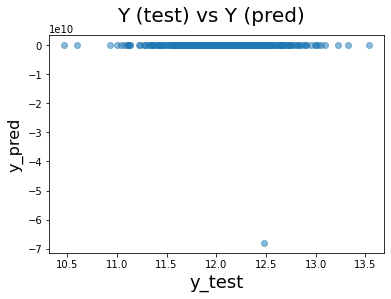

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('Y (test) vs Y (pred)', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

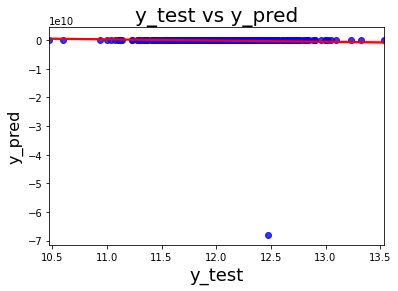

In [72]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [73]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, y_pred)

-6.227154593001712e+19

In [74]:
#Returns the mean squared error; we'll take a square root
mean_squared_error(y_test, y_pred)

1.0563990509195219e+19

As we already targetting to build Ridge and lasso regularized regression , we can go ahead for it by selecting the top features using RFE.

In [75]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,LotArea,True,1
3,BldgType,True,1
4,OverallQual,True,1
5,OverallCond,True,1
6,BsmtQual,True,1
7,BsmtExposure,True,1
8,BsmtFinType1,True,1
9,BsmtFinSF1,True,1


In [76]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [77]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### RIDGE REGRESSION

In [78]:
# list of alpha values

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20,25, 30, 50, 100 ]}

ridge = Ridge()

# cross validation withe GridSearchCV

folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 25, 30, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [79]:
# display the scores

ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,30,-0.014997,-0.021859,1
25,50,-0.015252,-0.021859,2
23,25,-0.014928,-0.021860,3
22,20,-0.014855,-0.021863,4
26,100,-0.015789,-0.021874,5
21,10.0,-0.014696,-0.021886,6
20,9.0,-0.014678,-0.021892,7
19,8.0,-0.014660,-0.021899,8
18,7.0,-0.014642,-0.021908,9
17,6.0,-0.014623,-0.021920,10


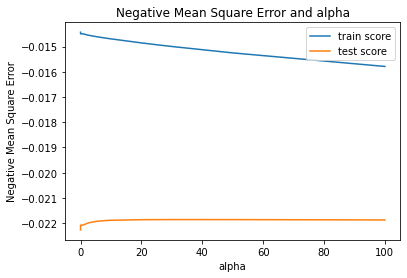

In [80]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plot

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Square Error')
plt.title("Negative Mean Square Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [81]:
# get the best estimator for lambda

ridge_cv.best_estimator_

Ridge(alpha=30)

In [82]:
# check the coefficient values with lambda = 30

alpha = 30
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01707005, -0.01634895,  0.03584241, -0.01016699,  0.08842804,
        0.04154017,  0.02793295,  0.02265239,  0.01620112, -0.03890299,
       -0.04377398,  0.08342772,  0.01909473,  0.01405262,  0.02385455,
        0.04687368,  0.0175039 ,  0.02837041,  0.01945673,  0.01375001,
        0.02401909,  0.02299695,  0.00507461,  0.01457159,  0.04721075,
        0.01344077,  0.03471122,  0.00894504,  0.02854104,  0.00687411,
        0.02267995,  0.01734038,  0.02497167,  0.02406672, -0.01514798,
       -0.00921226, -0.01335572,  0.01670871, -0.00510626, -0.01911538,
        0.00501465,  0.01116824,  0.01782365,  0.04186614,  0.02420039,
        0.03183039,  0.00738399,  0.01284034,  0.01785392,  0.00706018])

In [83]:
# Check the mean squared error
from sklearn.metrics import  r2_score,mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))

0.017237205324694287

In [84]:
# Put the Features and coefficient in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0171
1,LotFrontage,-0.0163
2,LotArea,0.0358
3,BldgType,-0.0102
4,OverallQual,0.0884
5,OverallCond,0.0415
6,BsmtQual,0.0279
7,BsmtExposure,0.0227
8,BsmtFinType1,0.0162
9,BsmtFinSF1,-0.0389


### LASSO REGRESSION

In [85]:
lasso = Lasso()

# list of alphas values 

params = {'alpha': [0.00005,0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [86]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0002,-0.014570,-0.022135,1
3,0.0003,-0.014617,-0.022141,2
1,0.0001,-0.014496,-0.022163,3
0,0.00005,-0.014464,-0.022178,4
4,0.0004,-0.014660,-0.022182,5
5,0.0005,-0.014711,-0.022225,6
6,0.001,-0.014969,-0.022246,7
7,0.002,-0.015260,-0.022457,8
8,0.003,-0.015618,-0.022828,9
9,0.004,-0.016059,-0.023026,10


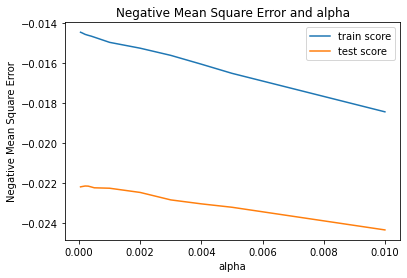

In [87]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plot

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Square Error')

plt.title("Negative Mean Square Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [88]:
# get the best estimator for lambda

lasso_cv.best_estimator_

Lasso(alpha=0.0002)

In [89]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01549167, -0.01552656,  0.0352397 , -0.01215249,  0.09252894,
        0.0424973 ,  0.02739655,  0.0220643 ,  0.0143421 , -0.05776238,
       -0.06623961,  0.10560662,  0.01918288, -0.00691056,  0.        ,
        0.07964941,  0.01558939,  0.02745335,  0.01929254,  0.01134975,
        0.02175153,  0.02146273,  0.        ,  0.01308946,  0.04807918,
        0.0134076 ,  0.05744672,  0.02229298,  0.07303011,  0.04727698,
        0.02296635,  0.01731499,  0.02489716,  0.02357686, -0.01533017,
       -0.00965637, -0.01363158,  0.01643917, -0.00554236, -0.02114118,
        0.00535238,  0.01264854,  0.02367753,  0.04835367,  0.02751807,
        0.05473322,  0.01312697,  0.02460309,  0.04004708,  0.01468855])

In [90]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.01641253167957523

In [91]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
11,TotalBsmtSF,0.1056
4,OverallQual,0.0925
14,GrLivArea,0.0796
26,MSZoning_RL,0.0730
24,MSZoning_FV,0.0574
43,GarageType_Attchd,0.0547
41,Foundation_PConc,0.0484
22,GarageCars,0.0481
27,MSZoning_RM,0.0473
5,OverallCond,0.0425


In [92]:
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9003224100985058
0.8983918603346409


In [93]:
y_pred_train = lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_pred_train))

y_pred_test = lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_pred_test))

0.9023633974140233
0.9032530633738339


From both the ridge and lasso regularisation model we built, lasso model has a better r2_score in test-set than ridge. The RMSE of test-set in lasso is also lower than that of ridge.

We will go ahead with lasso regression.

In [94]:
# Creating dataframe consisting of variables and their coefficients in both Ridge and Lasso Regression
model_coefficient_df = pd.DataFrame(index=X_test.columns)
model_coefficient_df.rows = X_test.columns

model_coefficient_df['Ridge_model'] = ridge.coef_
model_coefficient_df['Lasso_model'] = lasso.coef_

model_coefficient_df.head(10)

,Ridge_model,Lasso_model
MSSubClass,-0.017070,-0.015492
LotFrontage,-0.016349,-0.015527
LotArea,0.035842,0.035240
BldgType,-0.010167,-0.012152
OverallQual,0.088428,0.092529
OverallCond,0.041540,0.042497
BsmtQual,0.027933,0.027397
BsmtExposure,0.022652,0.022064
BsmtFinType1,0.016201,0.014342
BsmtFinSF1,-0.038903,-0.057762


In [95]:
#Looking at the top model variables of Ridge model
model_coefficient_df[['Ridge_model']].sort_values(by='Ridge_model', ascending=False).head(10)

,Ridge_model
OverallQual,0.088428
TotalBsmtSF,0.083428
GarageCars,0.047211
GrLivArea,0.046874
Foundation_PConc,0.041866
OverallCond,0.041540
LotArea,0.035842
MSZoning_FV,0.034711
GarageType_Attchd,0.031830
MSZoning_RL,0.028541


In [96]:
#Looking at the top model variables of lasso model
model_coefficient_df[['Lasso_model']].sort_values(by='Lasso_model', ascending=False).head(10)

,Lasso_model
TotalBsmtSF,0.105607
OverallQual,0.092529
GrLivArea,0.079649
MSZoning_RL,0.073030
MSZoning_FV,0.057447
GarageType_Attchd,0.054733
Foundation_PConc,0.048354
GarageCars,0.048079
MSZoning_RM,0.047277
OverallCond,0.042497


## Outcome

#### Our aim was to answer these questions to business :

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Since we can see the Lasso model is better in R2 square value and less mean square error . We can deploy that model .

The top ten variables which are describing the house price are following:
    


In [97]:
model_coefficient_df[['Lasso_model']].sort_values(by='Lasso_model', ascending=False).head(10)

,Lasso_model
TotalBsmtSF,0.105607
OverallQual,0.092529
GrLivArea,0.079649
MSZoning_RL,0.073030
MSZoning_FV,0.057447
GarageType_Attchd,0.054733
Foundation_PConc,0.048354
GarageCars,0.048079
MSZoning_RM,0.047277
OverallCond,0.042497


## Subjective Questions

#### Question number 1

- **What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [98]:
# Ridge Model with double alpha
ridge_model = Ridge(alpha=60)
ridge_model.fit(X_train, y_train)

# prediction
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print("Model Evaluation - Ridge Regression")
print('R2 score (train) - ',r2_score(y_train,y_train_pred))
print('R2 score (test) - ',r2_score(y_test,y_test_pred))
print('MSE (train) - ', mean_squared_error(y_train, y_train_pred))
print('MSE (test) - ', mean_squared_error(y_test, y_test_pred))

Model Evaluation - Ridge Regression
R2 score (train) -  0.8982862036176776
R2 score (test) -  0.8970594766840753
MSE (train) -  0.01578130724143847
MSE (test) -  0.01746323613907299


In [99]:
# Lasso Model with double alpha
lasso_model = Lasso(alpha=0.0004)
lasso_model.fit(X_train, y_train)

# prediction
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print("Model Evaluation - Lasso Regression")
print('R2 score (train) - ',r2_score(y_train,y_train_pred))
print('R2 score (test) - ',r2_score(y_test,y_test_pred))
print('MSE (train) - ',mean_squared_error(y_train, y_train_pred))
print('MSE (test) - ', mean_squared_error(y_test, y_test_pred))

Model Evaluation - Lasso Regression
R2 score (train) -  0.9017932016898293
R2 score (test) -  0.901395140270556
MSE (train) -  0.015237182294378895
MSE (test) -  0.016727717078246714


In [100]:
#Adding the new coefficients to the model_coefficients dataframe
model_coefficients_new_df = pd.DataFrame(index=X_test.columns)
model_coefficients_new_df.rows = X_test.columns

model_coefficients_new_df['Ridge_new'] = ridge_model.coef_
model_coefficients_new_df['Lasso_new'] = lasso_model.coef_

In [101]:
pd.DataFrame(model_coefficients_new_df.sort_values(by='Lasso_new', ascending=False).index[:10]).T

,0,1,2,3,4,5,6,7,8,9
0,TotalBsmtSF,OverallQual,GrLivArea,MSZoning_RL,GarageCars,Foundation_PConc,MSZoning_FV,OverallCond,GarageType_Attchd,LotArea


In [102]:
pd.DataFrame(model_coefficients_new_df.sort_values(by='Ridge_new', ascending=False).index[:10]).T

,0,1,2,3,4,5,6,7,8,9
0,OverallQual,TotalBsmtSF,GarageCars,GrLivArea,OverallCond,Foundation_PConc,LotArea,MSZoning_FV,FullBath,BsmtQual


#### Question number 3

- **After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [103]:
model_coefficient_df[['Lasso_model']].sort_values(by='Lasso_model', ascending=False).index[:5]

Index(['TotalBsmtSF', 'OverallQual', 'GrLivArea', 'MSZoning_RL',
       'MSZoning_FV'],
      dtype='object')

In [104]:
# Removing the top 5 predcitors from the X_train and X_test dataset
X_train = X_train.drop(['TotalBsmtSF', 'OverallQual', 'GrLivArea', 'MSZoning_RL','MSZoning_FV'], axis=1)
X_test= X_test.drop(['TotalBsmtSF', 'OverallQual', 'GrLivArea', 'MSZoning_RL','MSZoning_FV'], axis=1)

In [105]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
8,0.004,-0.100593,-0.107825,1
7,0.003,-0.100417,-0.107866,2
9,0.005,-0.100887,-0.107938,3
6,0.002,-0.100301,-0.108205,4
0,0.0001,-0.099568,-0.108364,5
2,0.0003,-0.099725,-0.108408,6
4,0.0005,-0.099795,-0.108410,7
3,0.0004,-0.099757,-0.108412,8
1,0.0002,-0.099723,-0.108415,9
5,0.001,-0.100090,-0.108466,10


In [107]:
# check the coefficient values with lambda = 0.004

alpha = 0.004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01773112, -0.0107434 ,  0.03423236, -0.        ,  0.03915113,
        0.05493712,  0.02308811,  0.01954001, -0.        ,  0.00104892,
        0.02129269,  0.07241573,  0.06034815,  0.01445397,  0.03785795,
        0.02278001,  0.01345923,  0.04873684,  0.03504213,  0.00154333,
        0.01820681,  0.06761761,  0.01093978, -0.        , -0.02159364,
        0.02111214,  0.01703839,  0.0259055 ,  0.02703955, -0.01001647,
        0.        , -0.00896886,  0.0158263 ,  0.        , -0.00593421,
        0.        ,  0.        ,  0.        ,  0.03370186,  0.00395741,
        0.01981705,  0.        ,  0.        , -0.        , -0.        ])

In [108]:
# Printing the top 5 model variables in the new Lasso model
model_coeff = pd.DataFrame(index=X_test.columns)
model_coeff.rows = X_test.columns
model_coeff['Lasso'] = lasso.coef_
model_coeff.sort_values(by='Lasso', ascending=False).index[:5]

Index(['1stFlrSF', 'GarageCars', '2ndFlrSF', 'BsmtQual', 'KitchenQual'], dtype='object')

**'1stFlrSF', 'GarageCars', '2ndFlrSF', 'BsmtQual', 'KitchenQual'**  will become the new important variables 